# K-Nearest Neighbour Model
### Implementation using SciKit-Learn

We will implement the KNN Model to classify data into a target class, using the SciKit-Learn library.

## 1. Load Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Load the date into a Data Frame

df = pd.read_csv("Classified Data", index_col=0)

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## 2. Standardize Scale
Standardize the scale of each column to guarantee that every variable has the same effect on the distance.

In [7]:
# Create an instance of the StandardScaler

scaler = StandardScaler()

In [8]:
# Fit the Scaler to the data, except the Target Class

scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [9]:
# Actually transform the data into an array

scaled_features = scaler.transform(df.drop("TARGET CLASS",axis=1))

In [10]:
# Cast array to DataFrame

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [11]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## 3. Split Data 
We need to split the data into two subgroups, one for training of the model and the other to test.

In [12]:
# Use train_test_split to split randomly, having 30% of the data for testing.

X = df_feat
y = df["TARGET CLASS"]

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 4. Apply KNN Model

In [13]:
# Instance of the classifier with k=1

knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
# Calculate predictions

pred = knn.predict(X_test)

## 5. Evaluate Model

In [16]:
# Confusion Matrix and Classification Report

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



The Confusion Matrix shows the quantities:
```
TP = 151    True Positive
FP =  15    False Positive
FN =   8    False Negative
TN = 126    True Negative
```

And the Classification Report stats:


* **Precision** *= TP/(TP+FP)*

Amount of true positives over all positive predictions

* **Recall** *= TP/(TP+FN)*

Amount of true positives succesfully classified

* **F1-Score** *= 2(Precision*Recall)/(Precision+Recall)*

Harmonic weighted average of Precision and Recall

* **Support** *= (TP+FN) or (FP+TN)*

Total class 0 or 1


Precision and Recall cannot be compared over two clases, this only means that the classifier is better at retrieving certain class than the other. So we can say that this model is better at finding elements from Class 1 (>Precision) but has higher sensitivity to catch items from Class 0 (>Recall). 


The weighted average F1-Score should be used to compare classifier models. However, the it does not take true negatives into account, hence measures such as the **Matthews correlation coefficient**, **Informedness** or **Cohen's kappa** may be preferred to assess the performance of a binary classifier.

## 6. Optimize
We need to optimize the model choosing a better k value. We will calculate for a set of k values the error associated to each prediction and plot those rates to find the optimal k value (**Elbow Method**).

In [22]:
# Iterate the model for different k values and calculate Error Rates 
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    error_rate.append(np.mean(prediction!=y_test)) # Mean of boolean array, 1: mistake, 0: right

Text(0, 0.5, 'Error Rate')

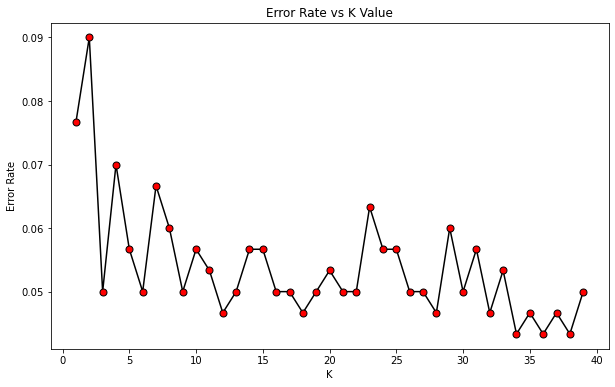

In [29]:
# Plot error rates to optimize k value

plt.figure(figsize=(10,6))
plt.plot(range(1,40), 
         error_rate, 
         color="black", 
         linestyle="-", 
         marker="o", 
         markerfacecolor="red", 
         markersize=7)
plt.title("Error Rate vs K-value")
plt.xlabel("K")
plt.ylabel("Error Rate")

## 7.  Run Test with new K-value
From the last graph we have chosen the value k=18 as the trend looks decreasing to 18 and then behaving randomlly afterwards.

In [28]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[155   4]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



This gives us a better result for the test, achieving an accuracy of 95% (+3%) and better F1-scores (+3% each). We now consider the model optimized for this particular training set.